In [3]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import time
from matplotlib import cm
from collections import OrderedDict

In [107]:
#physical line cut GXPNGMX
susc_phys_all = []
qp=120
q_tot = 21
orb=16
N=25
kz = 0
fil=13.0
my_path = f"C:/Users/amnedic/Documents/GitHub/RPA_SrCo2As2/results/2dcuts_including_finite_frequencies/2dcuts_high_resolution/GX_XM_MG/'+str(fil)+'/'
omegalist = np.linspace(0,0.30,num=31)
suscall_omega = []
for omega in omegalist:
    suscall = []
    for q in range(qp):
        suscGXMG = np.loadtxt(my_path+'GX_XM_MG_N='+str(N)+'_fil='+str(fil)+'_omega='+str(omega)+'_q='+str(q)+'.dat', dtype=complex)
        suscall.append(suscGXMG)
    suscG = np.loadtxt(my_path+'GX_XM_MG_N='+str(N)+'_fil='+str(fil)+'_omega='+str(omega)+'_q=0.dat', dtype=complex)
    suscall.append(suscG)
    suscall_omega.append(suscall)
    print(np.shape(suscall_omega))

(1, 121, 65536)
(2, 121, 65536)
(3, 121, 65536)
(4, 121, 65536)
(5, 121, 65536)
(6, 121, 65536)
(7, 121, 65536)
(8, 121, 65536)
(9, 121, 65536)
(10, 121, 65536)
(11, 121, 65536)
(12, 121, 65536)
(13, 121, 65536)
(14, 121, 65536)
(15, 121, 65536)
(16, 121, 65536)
(17, 121, 65536)
(18, 121, 65536)
(19, 121, 65536)
(20, 121, 65536)
(21, 121, 65536)
(22, 121, 65536)
(23, 121, 65536)
(24, 121, 65536)
(25, 121, 65536)
(26, 121, 65536)
(27, 121, 65536)
(28, 121, 65536)
(29, 121, 65536)
(30, 121, 65536)
(31, 121, 65536)


In [108]:
print(np.shape(suscall_omega))

(31, 121, 65536)


In [109]:
#physical susceptibility
def inv_physical_susc(U, JUratio, qnt, omega):
    J = JUratio*U
    U1 = U-2*J
    J1 = J
    o=5
    inter=np.zeros((o**2,o**2), dtype=complex)
    lis = []
    for i in range(o**2):
        inter[i,i] = U1
    for i in range(o):
        param = o*i+i
        lis.append(param)
        inter[param,param]=U
    for k in lis:
        for m in lis:
            if m !=k:
                inter[k,m] = J
    for k in range(o):
        for m in range(o):
            A = o*k+m
            B = o*m+k
            if m !=k:
                inter[A,B] = J1
    inter5=inter
    
    Co = np.zeros((80,80),dtype=complex)
    Co[0:5,0:5] = inter5[0:5,0:5]
    Co[16:21,16:21] = inter5[5:10,5:10]
    Co[32:37,32:37] = inter5[10:15,10:15]
    Co[48:53,48:53] = inter5[15:20,15:20]
    Co[64:69,64:69] = inter5[20:25,20:25]
    Co[0:5,16:21] = inter5[0:5,5:10]
    Co[0:5,32:37] = inter5[0:5,10:15]
    Co[0:5,48:53] = inter5[0:5,15:20]
    Co[0:5,64:69] = inter5[0:5,20:25]
    Co[16:21,0:5] = inter5[5:10,0:5]
    Co[16:21,32:37] = inter5[5:10,10:15]
    Co[16:21,48:53] = inter5[5:10,15:20]
    Co[16:21,64:69] = inter5[5:10,20:25]
    Co[32:37,0:5] = inter5[10:15,0:5]
    Co[32:37,16:21] = inter5[10:15,5:10]
    Co[32:37,48:53] = inter5[10:15,15:20]
    Co[32:37,64:69] = inter5[10:15,20:25]
    Co[48:53,0:5] = inter5[15:20,0:5]
    Co[48:53,16:21] = inter5[15:20,5:10]
    Co[48:53,32:37] = inter5[15:20,10:15]
    Co[48:53,64:69] = inter5[15:20,20:25]
    Co[64:69,0:5] = inter5[20:25,0:5]
    Co[64:69,16:21] = inter5[20:25,5:10]
    Co[64:69,32:37] = inter5[20:25,10:15]
    Co[64:69,48:53] = inter5[20:25,15:20]
    
    As = np.zeros((48,48),dtype=complex)

    INT_inter = np.zeros((269,269),dtype=complex)
    INT=np.zeros((256,256),dtype=complex)
    INT_inter[0:80,0:80] = Co
    INT_inter[85:165,85:165] = Co
    INT_inter[170:218,170:218] = As
    INT_inter[221:269,221:269] = As
    INT = INT_inter[0:256,0:256]

    o=16
    susc_resh=np.reshape(np.transpose(suscall_omega[omega][qnt]), (o**2,o**2))
    inver = np.dot(np.linalg.inv(np.identity(o**2) - np.dot((susc_resh), INT)), susc_resh)
    
    #physical
    lis = []
    for i in range(o):
        lis.append(o*i+i)
    susc_phys_component = []
    for i in lis:
        for k in lis:
            susc_phys_component.append(inver[k][i])
    susc_phys=0.5*np.imag((np.sum(susc_phys_component)))
    return susc_phys

In [110]:
def smallfunc(U, JUratio, omega):
    phys = []
    for qnt in range(qp+1):
        susc_p = inv_physical_susc(U,JUratio,qnt, omega)
        phys.append(susc_p)
    return phys

In [111]:
# #12.78
# U=2.94017731*0.995
# JUratio = 0.25
# # U=3.158537376*0.995
# # JUratio = 0

# #13.12
# U=1.672210008*0.995
# JUratio = 0.25

#13.00
U=1.745195776*0.995
JUratio = 0.25

imag_disp = [smallfunc(U, JUratio, 30), smallfunc(U, JUratio, 29), smallfunc(U, JUratio, 28), smallfunc(U, JUratio, 27),smallfunc(U, JUratio, 26),smallfunc(U, JUratio, 25),smallfunc(U, JUratio, 24),smallfunc(U, JUratio, 23),smallfunc(U, JUratio, 22),smallfunc(U, JUratio, 21),smallfunc(U, JUratio, 20), smallfunc(U, JUratio, 19), smallfunc(U, JUratio, 18), smallfunc(U, JUratio, 17),smallfunc(U, JUratio, 16),smallfunc(U, JUratio, 15),smallfunc(U, JUratio, 14),smallfunc(U, JUratio, 13),smallfunc(U, JUratio, 12),smallfunc(U, JUratio, 11),smallfunc(U, JUratio, 10), smallfunc(U, JUratio, 9), smallfunc(U, JUratio, 8), smallfunc(U, JUratio, 7),smallfunc(U, JUratio, 6),smallfunc(U, JUratio, 5),smallfunc(U, JUratio, 4),smallfunc(U, JUratio, 3),smallfunc(U, JUratio, 2),smallfunc(U, JUratio, 1)]
#imag_disp = [smallfunc(U, JUratio, 15),smallfunc(U, JUratio, 14),smallfunc(U, JUratio, 13),smallfunc(U, JUratio, 12),smallfunc(U, JUratio, 11),smallfunc(U, JUratio, 10), smallfunc(U, JUratio, 9), smallfunc(U, JUratio, 8), smallfunc(U, JUratio, 7),smallfunc(U, JUratio, 6),smallfunc(U, JUratio, 5),smallfunc(U, JUratio, 4),smallfunc(U, JUratio, 3),smallfunc(U, JUratio, 2),smallfunc(U, JUratio, 1)]

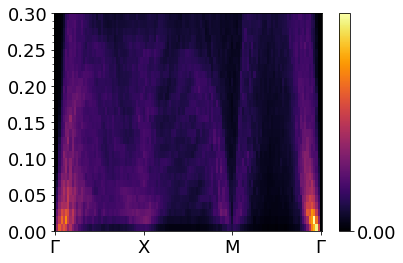

In [114]:
width = 1.5*3.375
height = width/1.618
x_min = 0-0.5
x_max = 121-0.5
y_min = 0.0
y_max = 0.3001
deltax = 20
deltay = 0.05

fig = plt.figure()
fig = plt.figure(1, figsize = [width,height])
ax = fig.add_subplot(111)
cax = ax.matshow(imag_disp, extent=[x_min,x_max,y_min,y_max], aspect='auto', cmap=cm.inferno)
plt.gca().xaxis.tick_bottom()

#ticks
grid_x_ticks = np.arange(x_min+0.5, x_max+0.5, 40)
grid_y_ticks = np.arange(y_min, y_max, deltay)
ax.set_xticks(grid_x_ticks , minor=False)
ax.set_yticks(grid_y_ticks, minor=False)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_xticklabels(['$\Gamma$','X', 'M','$\Gamma$'])
#plt.ylabel('$\omega$')

#colorbar
cbar = fig.colorbar(cax)
cbar.solids.set_edgecolor("face")
for t in cbar.ax.get_yticklabels():
    t.set_fontsize(18)
from matplotlib import ticker
cbar.locator = ticker.MultipleLocator(base=np.max(imag_disp)/4)
cbar.update_ticks()
cbar.set_ticks([0,3.35,6.7,10.05,13.4])  # vertically oriented colorbar
#cbar.set_label('Im $\chi(\omega)$',rotation=0, labelpad=-20, y=1.1,)

for t in ax.get_yticklabels():
    t.set_fontsize(18)
    
for t in ax.get_xticklabels():
    t.set_fontsize(18)

deltax = 1
deltay = 0.01
grid_y_ticks = np.arange(y_min, y_max, deltay)
ax.set_yticks(grid_y_ticks, minor=True)

plt.show()